In [40]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import datetime as dt

In [7]:
path_origin = '/glade/collections/rda/data/ds277.7/avhrr_v2.1/'

In [10]:
def list_files_recursive(directory):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            file_list.append(file_path)
    return np.sort(file_list)

In [12]:
list_files_original = list_files_recursive(path_origin)

In [33]:
list_files_original

array(['/glade/collections/rda/data/ds277.7/avhrr_v2.1/1981/oisst-avhrr-v02r01.19810901.nc',
       '/glade/collections/rda/data/ds277.7/avhrr_v2.1/1981/oisst-avhrr-v02r01.19810902.nc',
       '/glade/collections/rda/data/ds277.7/avhrr_v2.1/1981/oisst-avhrr-v02r01.19810903.nc',
       ...,
       '/glade/collections/rda/data/ds277.7/avhrr_v2.1/2023/oisst-avhrr-v02r01.20230523.nc',
       '/glade/collections/rda/data/ds277.7/avhrr_v2.1/2023/oisst-avhrr-v02r01.20230524.nc',
       '/glade/collections/rda/data/ds277.7/avhrr_v2.1/2023/oisst-avhrr-v02r01.20230525.nc'],
      dtype='<U82')

In [80]:
path_temp = list_files_original[55]

In [91]:
path_temp = '/glade/collections/rda/data/ds277.7/avhrr_v2.1/1982/oisst-avhrr-v02r01.19820803.nc'

In [53]:
name_variable = 'SST'
folder_outputs = '/glade/work/jhayron/Data4Predictability/OISSTv2/SST/'
date_str_out = str(dt.datetime.strptime(os.path.basename(path_temp).split('.')[-2],'%Y%m%d').date())
path_out = f'{folder_outputs}{name_variable}_Daily_05Deg_{date_str_out}.nc'

In [92]:
dataset_temp = xr.open_dataset(path_temp)
dataset_temp = dataset_temp['sst'].mean('zlev').to_dataset()

In [93]:
dataset_temp_regridded = xr.open_dataset('/glade/work/jhayron/Data4Predictability/OISSTv2/SST/SST_Daily_05Deg_1982-08-03.nc')


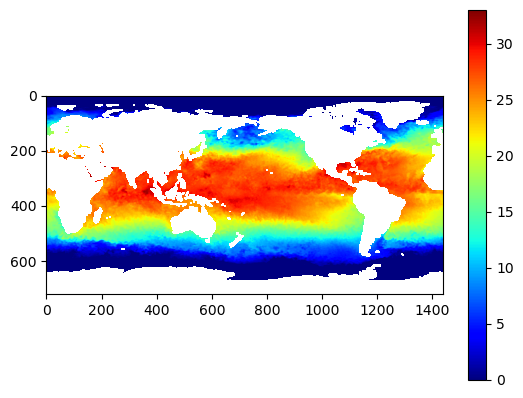

In [94]:
plt.imshow(dataset_temp.sst[0][::-1],vmin=0,vmax=33,cmap='jet')
plt.colorbar()

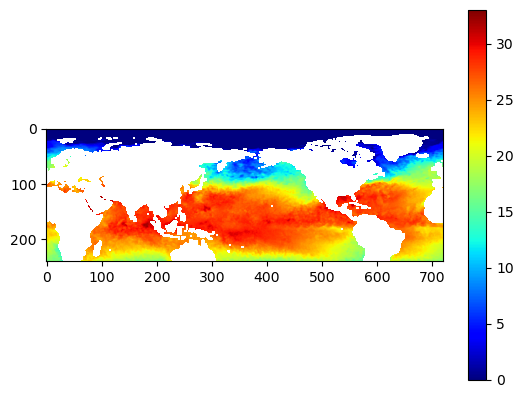

In [95]:
plt.imshow(dataset_temp_regridded.sst[0][::-1],vmin=0,vmax=33,cmap='jet')
plt.colorbar()

In [61]:
dataset_temp

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 1)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1981-09-01T12:00:00
Data variables:
    sst      (time, lat, lon) float32 nan nan nan nan ... -1.1 -1.1 -1.1 -1.1